# Curlometer Technique

This notebook shows how to calculate div(B), curl(B), total current, perpendicular and parallel currents using the curlometer technique. For more information on this technique, see: 

Chanteur, G., Spatial Interpolation for Four Spacecraft: Theory, Chapter 14 of Analysis methods for multi-spacecraft data, G. Paschmann and P. W. Daly (Eds.) ISSI Scientific Report SR-001. 

This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.


In [ ]:
!pip install pyspedas

In [1]:
from pyspedas.mms import mec, fgm, curlometer
from pytplot import tplot

In [2]:
trange = ['2016-12-09/09:02', '2016-12-09/09:04']

Load the FGM data

In [3]:
fgm_vars = fgm(probe=[1, 2, 3, 4], trange=trange, data_rate='brst', time_clip=True, varformat='*_gse_*')

08-Dec-23 11:23:46: Downloading mms1_fgm_brst_l2_20161209090054_v5.87.0.cdf to pydata/mms1/fgm/brst/l2/2016/12/09
08-Dec-23 11:23:47: Downloading mms1_fgm_brst_l2_20161209090304_v5.87.0.cdf to pydata/mms1/fgm/brst/l2/2016/12/09
08-Dec-23 11:23:49: Downloading mms2_fgm_brst_l2_20161209090054_v5.87.0.cdf to pydata/mms2/fgm/brst/l2/2016/12/09
08-Dec-23 11:23:50: Downloading mms2_fgm_brst_l2_20161209090304_v5.87.0.cdf to pydata/mms2/fgm/brst/l2/2016/12/09
08-Dec-23 11:23:53: Downloading mms3_fgm_brst_l2_20161209090054_v5.87.0.cdf to pydata/mms3/fgm/brst/l2/2016/12/09
08-Dec-23 11:23:55: Downloading mms3_fgm_brst_l2_20161209090304_v5.87.0.cdf to pydata/mms3/fgm/brst/l2/2016/12/09
08-Dec-23 11:23:56: Downloading mms4_fgm_brst_l2_20161209090054_v5.87.0.cdf to pydata/mms4/fgm/brst/l2/2016/12/09
08-Dec-23 11:23:59: Downloading mms4_fgm_brst_l2_20161209090304_v5.87.0.cdf to pydata/mms4/fgm/brst/l2/2016/12/09
08-Dec-23 11:24:00: Time clip was applied to: mms1_fgm_b_gse_brst_l2
08-Dec-23 11:24:00:

Load the spacecraft position data

In [4]:
mec_vars = mec(probe=[1, 2, 3, 4], trange=trange, data_rate='brst', time_clip=True, varformat='*_r_gse')

08-Dec-23 11:24:02: Downloading mms1_mec_brst_l2_epht89q_20161209090055_v2.2.0.cdf to pydata/mms1/mec/brst/l2/epht89q/2016/12/09
08-Dec-23 11:24:05: Downloading mms1_mec_brst_l2_epht89q_20161209090305_v2.2.0.cdf to pydata/mms1/mec/brst/l2/epht89q/2016/12/09
08-Dec-23 11:24:07: Downloading mms2_mec_brst_l2_epht89q_20161209090055_v2.2.0.cdf to pydata/mms2/mec/brst/l2/epht89q/2016/12/09
08-Dec-23 11:24:10: Downloading mms2_mec_brst_l2_epht89q_20161209090305_v2.2.0.cdf to pydata/mms2/mec/brst/l2/epht89q/2016/12/09
08-Dec-23 11:24:13: Downloading mms3_mec_brst_l2_epht89q_20161209090055_v2.2.0.cdf to pydata/mms3/mec/brst/l2/epht89q/2016/12/09
08-Dec-23 11:24:16: Downloading mms3_mec_brst_l2_epht89q_20161209090305_v2.2.0.cdf to pydata/mms3/mec/brst/l2/epht89q/2016/12/09
08-Dec-23 11:24:20: Downloading mms4_mec_brst_l2_epht89q_20161209090055_v2.2.0.cdf to pydata/mms4/mec/brst/l2/epht89q/2016/12/09
08-Dec-23 11:24:23: Downloading mms4_mec_brst_l2_epht89q_20161209090305_v2.2.0.cdf to pydata/mms4

Note: if the position and fields variables are in GSE coordinates, the output vectors will be in GSE coordinates

In [5]:
positions = ['mms1_mec_r_gse', 'mms2_mec_r_gse', 'mms3_mec_r_gse', 'mms4_mec_r_gse']
fields = ['mms1_fgm_b_gse_brst_l2', 'mms2_fgm_b_gse_brst_l2', 'mms3_fgm_b_gse_brst_l2', 'mms4_fgm_b_gse_brst_l2']

In [6]:
curlometer_vars = curlometer(fields=fields, positions=positions)

08-Dec-23 11:24:27: tinterpol (linear) was applied to: mms2_fgm_b_gse_brst_l2_i
08-Dec-23 11:24:27: tinterpol (linear) was applied to: mms3_fgm_b_gse_brst_l2_i
08-Dec-23 11:24:27: tinterpol (linear) was applied to: mms4_fgm_b_gse_brst_l2_i
08-Dec-23 11:24:27: tinterpol (linear) was applied to: mms1_mec_r_gse_i
08-Dec-23 11:24:27: tinterpol (linear) was applied to: mms2_mec_r_gse_i
08-Dec-23 11:24:27: tinterpol (linear) was applied to: mms3_mec_r_gse_i
08-Dec-23 11:24:27: tinterpol (linear) was applied to: mms4_mec_r_gse_i


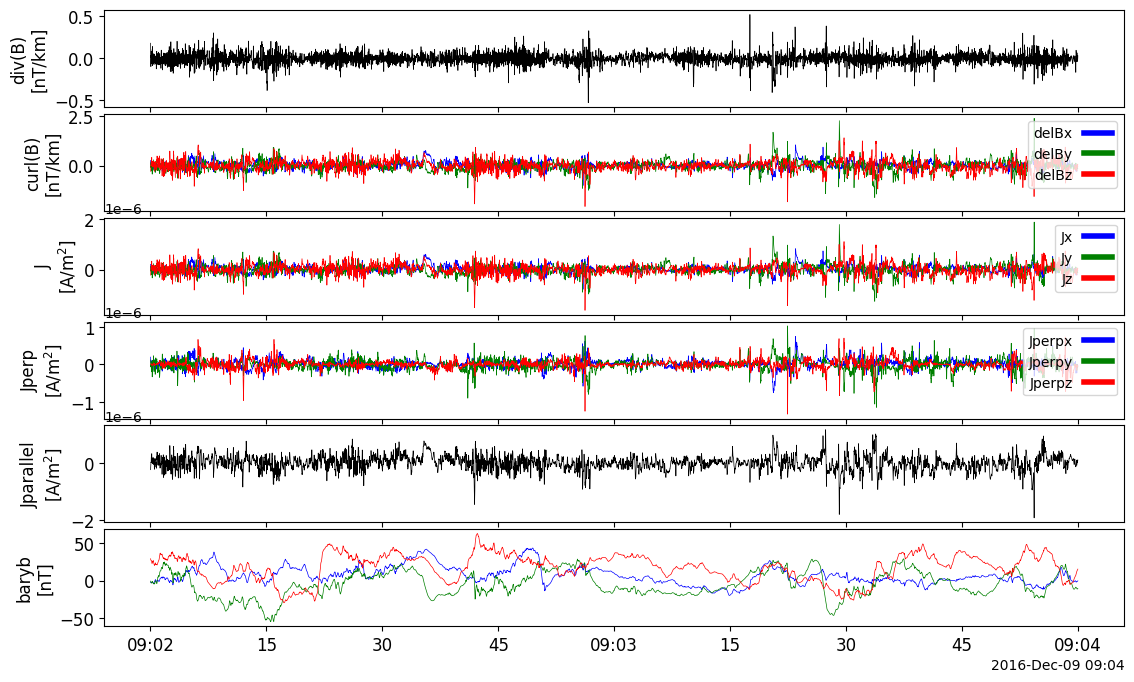

In [7]:
tplot(['divB', 'curlB', 'jtotal', 'jperp', 'jpar', 'baryb'])